In [1]:
import pandas as pd
import numpy as np
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score ,f1_score,roc_curve,precision_recall_curve
import matplotlib.pyplot as plt

In [2]:
%load_ext autoreload
%autoreload 2
from data_prep import df_prep  
from data_prep import  NLP_Vectorizer
from data_prep import parse_line
from model_src import NLP_model


[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /Users/nathan/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     /Users/nathan/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     /Users/nathan/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     /Users/nathan/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     /Users/nathan/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /Users/nathan/nltk_data...
[nltk_data]    |   Package movie_reviews is already

In [3]:
col_names = ['marketplace','customer_id','review_id','product_id','product_parent','product_title','product_category','star_rating','helpful_votes','total_votes','vine','verified_purchase','review_headline','review_body','review_date']
cols = {}
for i in range(len(col_names)):
    print (str(i)+': '+col_names[i])
    cols[col_names[i]] = i

0: marketplace
1: customer_id
2: review_id
3: product_id
4: product_parent
5: product_title
6: product_category
7: star_rating
8: helpful_votes
9: total_votes
10: vine
11: verified_purchase
12: review_headline
13: review_body
14: review_date


In [4]:
np.random.seed(500)
df = pd.read_csv('data/Spark_Pulls/us_Books_v1_02.csv')


#df = df.sample(frac=.03, random_state=1)
len(df)

66723

In [5]:
np.mean(df['8']/df['9'])

0.5139304696428333

In [6]:
#Corpus = df_prep(df,np.mean(df['8']/df['9']),.0)
Corpus = pd.read_csv('data/Books_02_Corpus.csv')
Corpus['text_final'] = Corpus['text_final'].fillna(' ')
Corpus  = Corpus.sample(frac=.01, random_state=1)

In [7]:
#Corpus.to_csv('data/Books_02_Corpus.csv')

In [8]:
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(Corpus[['text','text_final','help_score','help_votes','stars']],Corpus['label'],test_size=0.3)



In [9]:
CV_2K = NLP_Vectorizer('CV',{'max_features':2000,'ngram_range':(1,3)})
TF_IDF_2K =NLP_Vectorizer('TF_IDF',{'max_features':2000,'ngram_range':(1,3)})

In [10]:
CV_4K = NLP_Vectorizer('CV',{'max_features':4000,'ngram_range':(1,3)})
TF_IDF_4K =NLP_Vectorizer('TF_IDF',{'max_features':4000,'ngram_range':(1,3)}) 

In [11]:
CV_400 = NLP_Vectorizer('CV',{'max_features':400,'ngram_range':(1,3)})
TF_IDF_400 =NLP_Vectorizer('TF_IDF',{'max_features':400,'ngram_range':(1,3)})

In [12]:
orig_Train_Y = Train_Y
Test_Y = CV_2K.encode_Y(Test_Y)
Train_Y = CV_2K.encode_Y(Train_Y)

In [13]:
CV_2K.fit(Train_X['text_final'])
Train_X_Vector_CV_2K = CV_2K.transform(Train_X['text_final'])
Test_X_Vector_CV_2K = CV_2K.transform(Test_X['text_final'])

In [14]:
CV_4K.fit(Train_X['text_final'])
Train_X_Vector_CV_4K = CV_4K.transform(Train_X['text_final'])
Test_X_Vector_CV_4K = CV_4K.transform(Test_X['text_final'])

In [15]:
CV_400.fit(Train_X['text_final'])
Train_X_Vector_CV_400 = CV_400.transform(Train_X['text_final'])
Test_X_Vector_CV_400 = CV_400.transform(Test_X['text_final'])

In [16]:
TF_IDF_2K.fit(Train_X['text_final'])
Train_X_Vector_TF_IDF_2K = TF_IDF_2K.transform(Train_X['text_final'])
Test_X_Vector_TF_IDF_2K = TF_IDF_2K.transform(Test_X['text_final'])

In [17]:
TF_IDF_4K.fit(Train_X['text_final'])
Train_X_Vector_TF_IDF_4K = TF_IDF_4K.transform(Train_X['text_final'])
Test_X_Vector_TF_IDF_4K = TF_IDF_4K.transform(Test_X['text_final'])

In [18]:
TF_IDF_400.fit(Train_X['text_final'])
Train_X_Vector_TF_IDF_400 = TF_IDF_400.transform(Train_X['text_final'])
Test_X_Vector_TF_IDF_400 = TF_IDF_400.transform(Test_X['text_final'])

In [19]:
SVC_Standard = NLP_model('SVC',{'degree':3,'gamma':'auto','kernel':'linear','C':1.0})

In [20]:
RF_Standard =  NLP_model('RF',{'n_estimators':1500})

In [21]:
LR_Standard = NLP_model('LR')

In [22]:
XG_Standard = NLP_model('XGBoost',{'max_depth':5,'n_estimators':1000,'learning_rate':.01})

In [23]:
data_set_train = Train_X_Vector_TF_IDF_2K
data_set_test = Test_X_Vector_TF_IDF_2K

## SVC Classifier

In [24]:
SVC_Standard.fit(data_set_train,Train_Y)

SVC_Standard_predict_proba = SVC_Standard.predict_proba(data_set_test)

SVC_fpr, SVC_tpr, SVC_thresholds = roc_curve(Test_Y,SVC_Standard_predict_proba[:,1])

SVC_precision, SVC_recall, SVC_thresholds = precision_recall_curve(Test_Y,SVC_Standard_predict_proba[:,1])

Text(0, 0.5, 'True Positive')

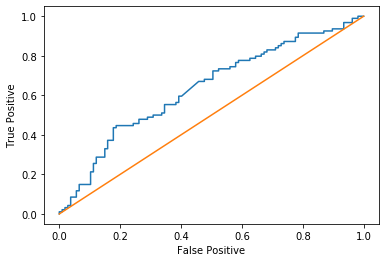

In [25]:
plt.plot(SVC_fpr,SVC_tpr)
plt.plot([0,1],[0,1])
plt.xlabel('False Positive')
plt.ylabel('True Positive')


Text(0, 0.5, 'recall')

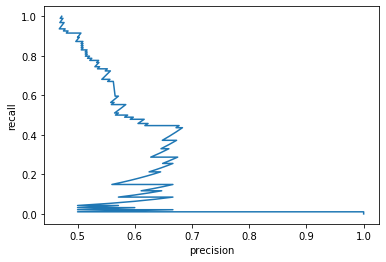

In [26]:
plt.plot(SVC_precision,SVC_recall)

plt.xlabel('precision')
plt.ylabel('recall')

## RF Classifier

In [27]:
RF_Standard.fit(data_set_train,Train_Y)

RF_Standard_predict_proba = RF_Standard.predict_proba(data_set_test)

RF_fpr, RF_tpr, thresholds = roc_curve(Test_Y,RF_Standard_predict_proba[:,1])

RF_precision, RF_recall, thresholds = precision_recall_curve(Test_Y,RF_Standard_predict_proba[:,1])

Text(0, 0.5, 'True Positive')

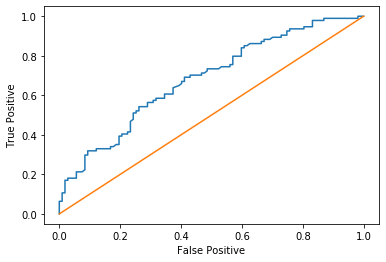

In [28]:
plt.plot(RF_fpr,RF_tpr)
plt.plot([0,1],[0,1])
plt.xlabel('False Positive')
plt.ylabel('True Positive')


Text(0, 0.5, 'recall')

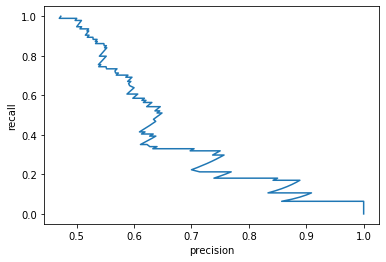

In [29]:
plt.plot(RF_precision,RF_recall)

plt.xlabel('precision')
plt.ylabel('recall')

## XGBoost Classifier

In [30]:
XG_Standard.fit(data_set_train,Train_Y)

XG_Standard_predict_proba = XG_Standard.predict_proba(data_set_test)

XG_fpr, XG_tpr, thresholds = roc_curve(Test_Y,XG_Standard_predict_proba[:,1])

XG_precision, XG_recall, thresholds = precision_recall_curve(Test_Y,XG_Standard_predict_proba[:,1])

Text(0, 0.5, 'True Positive')

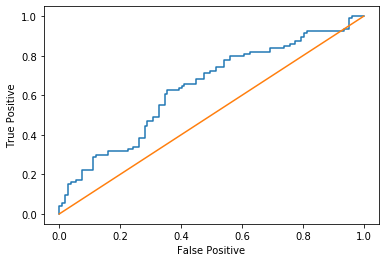

In [31]:
plt.plot(XG_fpr,XG_tpr)
plt.plot([0,1],[0,1])
plt.xlabel('False Positive')
plt.ylabel('True Positive')

Text(0, 0.5, 'recall')

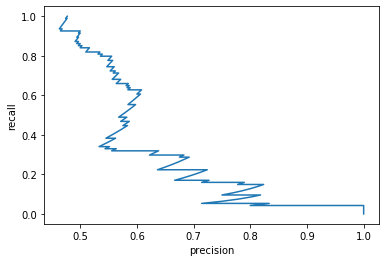

In [32]:
plt.plot(XG_precision,XG_recall)

plt.xlabel('precision')
plt.ylabel('recall')

## Logistic Regression Classifier

In [33]:
LR_Standard.fit(data_set_train,Train_Y)

LR_Standard_predict_proba = LR_Standard.predict_proba(data_set_test)

LR_fpr, LR_tpr, thresholds = roc_curve(Test_Y,LR_Standard_predict_proba[:,1])

LR_precision, LR_recall, thresholds = precision_recall_curve(Test_Y,LR_Standard_predict_proba[:,1])

/Users/nathan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Text(0, 0.5, 'True Positive')

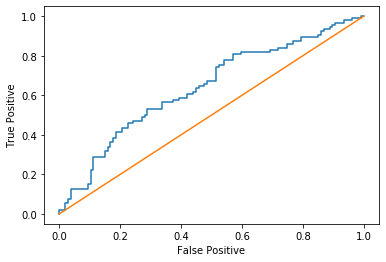

In [34]:
plt.plot(LR_fpr,LR_tpr)
plt.plot([0,1],[0,1])
plt.xlabel('False Positive')
plt.ylabel('True Positive')

Text(0, 0.5, 'recall')

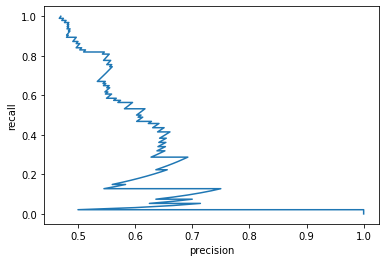

In [35]:
plt.plot(LR_precision,LR_recall)

plt.xlabel('precision')
plt.ylabel('recall')

# Total Classifiers

In [47]:
plt.style.use('fivethirtyeight')

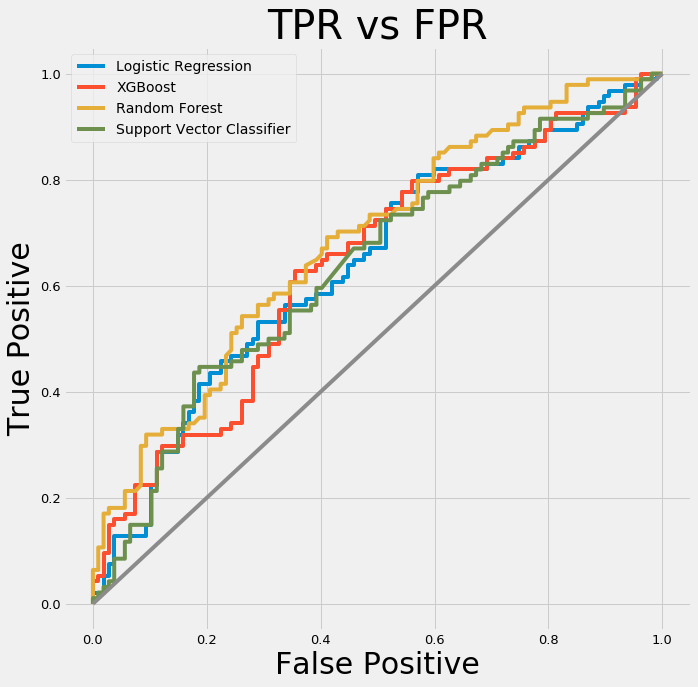

In [52]:
plt.figure(figsize=(10,10))
plt.plot(LR_fpr,LR_tpr,label='Logistic Regression')
plt.plot(XG_fpr,XG_tpr,label='XGBoost')
plt.plot(RF_fpr,RF_tpr,label='Random Forest')
plt.plot(SVC_fpr,SVC_tpr,label='Support Vector Classifier')
plt.plot([0,1],[0,1])
plt.title('TPR vs FPR',fontsize=40)
plt.xlabel('False Positive',fontsize=30)
plt.ylabel('True Positive',fontsize=30)
plt.legend(prop={'size': 18})
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend()
plt.savefig('Viz/ROC_Curve.png')

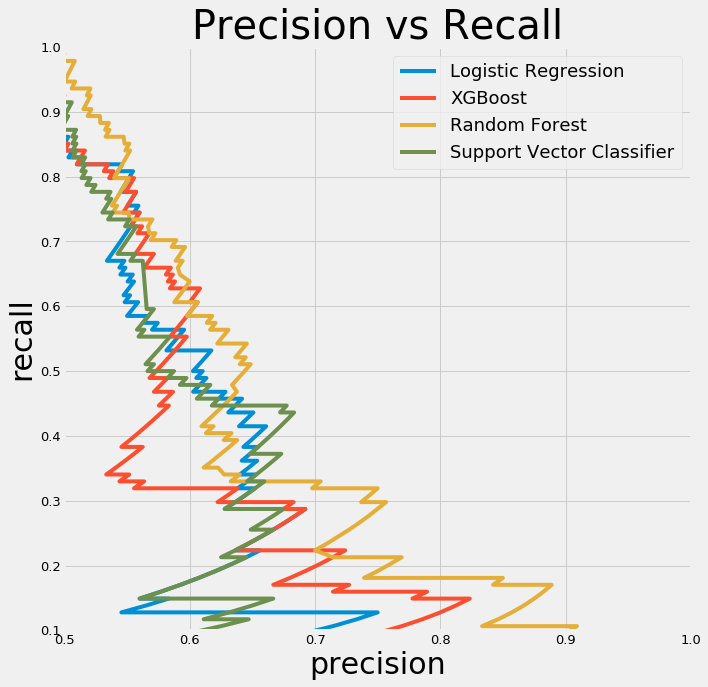

In [53]:
plt.figure(figsize=(10,10))
plt.plot(LR_precision,LR_recall,label='Logistic Regression')
plt.plot(XG_precision,XG_recall,label='XGBoost')
plt.plot(RF_precision,RF_recall,label='Random Forest')
plt.plot(SVC_precision,SVC_recall,label='Support Vector Classifier')

plt.title('Precision vs Recall',fontsize=40)
plt.xlabel('precision',fontsize=30)
plt.ylabel('recall',fontsize=30)
plt.legend(prop={'size': 18})
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.ylim(.1,1)
plt.xlim(.5,1)
plt.savefig('Viz/Precision_Recall_Curve.png')